In [1]:
%pip install seaborn

In [2]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


In [3]:
#Load the "loan_old.csv" dataset.
data = pandas.read_csv('loan_old.csv')

#check whether there are missing values
missing_values = data.isnull().sum()
print('Missing values:\n',missing_values)

print('----------------------')

Missing values:
 Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64
----------------------


Data types:
 Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Income                  int64
Coapplicant_Income    float64
Loan_Tenor            float64
Credit_History        float64
Property_Area          object
Max_Loan_Amount       float64
Loan_Status            object
dtype: object
----------------------


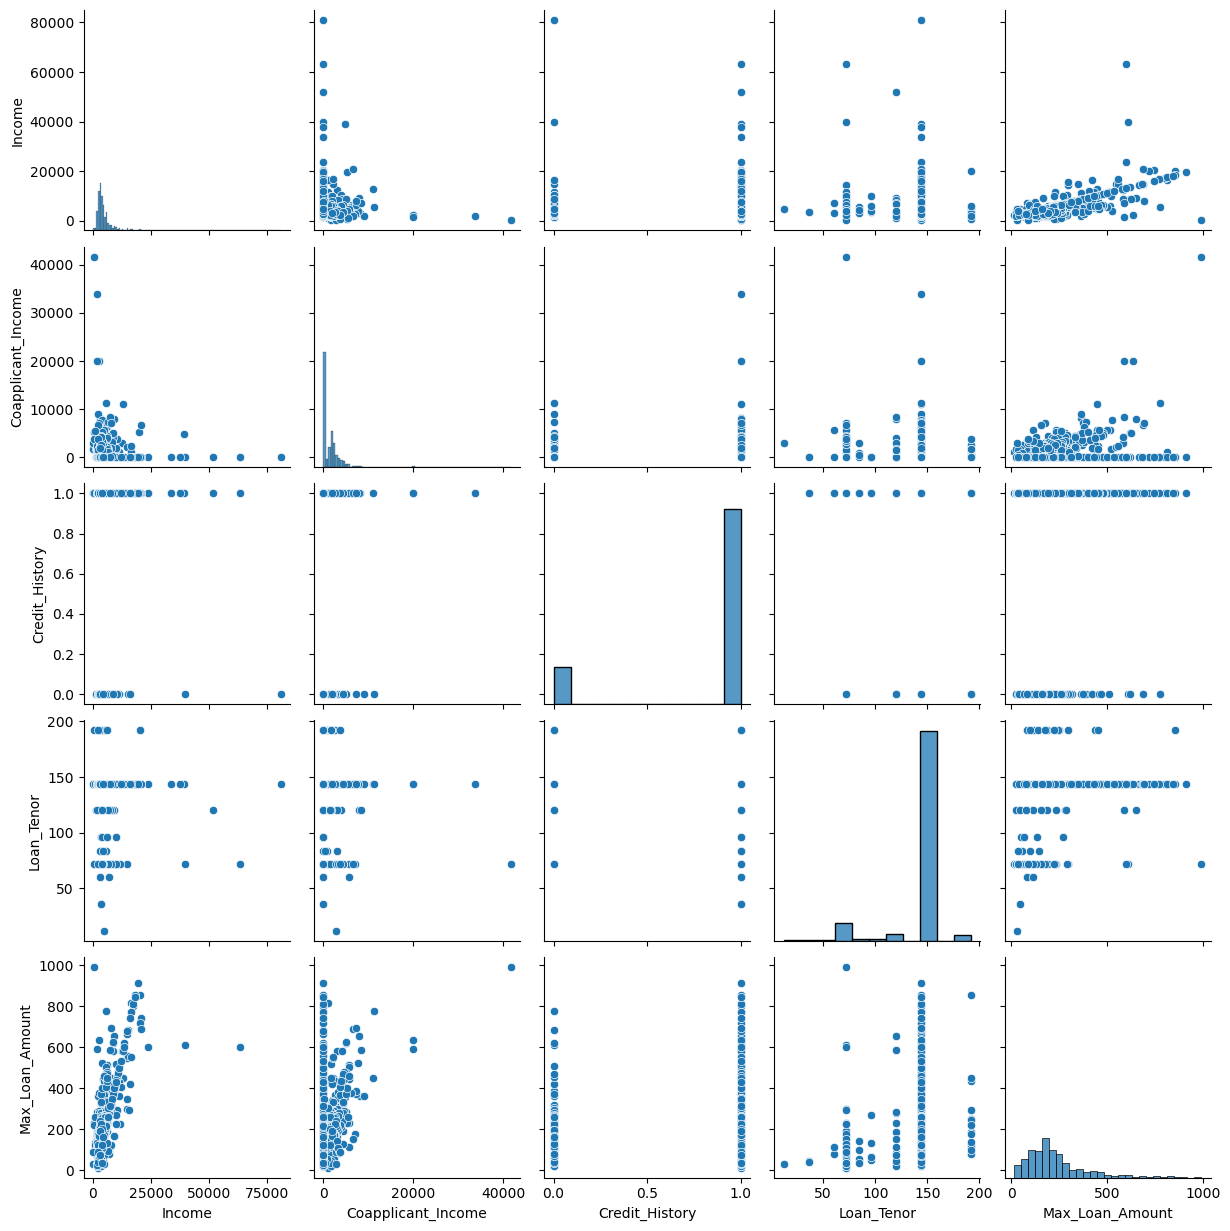

In [4]:
#check the type of each feature (categorical or numerical)
data_types = data.dtypes

print('Data types:\n',data_types)

print('----------------------')


#visualize a pairplot between numercial columns
sns.pairplot(data[['Income','Coapplicant_Income','Credit_History','Loan_Tenor','Max_Loan_Amount']])
#plot.show()


In [5]:
#records containing missing values are removed
data.drop(columns=['Loan_ID'], inplace=True)
if data.isnull().values.any():
    data_cleaned_rows = data.dropna()


data_types = data_cleaned_rows.dtypes

print('----------------------')

#check whether numerical features have the same scale
print('Numerical features describe: \n')

numerical_column_name=['Income','Coapplicant_Income','Loan_Tenor']
describe_data=data_cleaned_rows[numerical_column_name].describe()
print(describe_data)


print('----------------------')

----------------------
Numerical features describe: 

             Income  Coapplicant_Income  Loan_Tenor
count    513.000000          513.000000  513.000000
mean    5030.730994         1486.627524  137.660819
std     4469.976643         2102.196620   23.139902
min      150.000000            0.000000   36.000000
25%     2889.000000            0.000000  144.000000
50%     3800.000000         1126.000000  144.000000
75%     5703.000000         2250.000000  144.000000
max    63337.000000        20000.000000  192.000000
----------------------


In [6]:
label_encoder = LabelEncoder()


#categorical features and targets are encoded
for column_name in data_cleaned_rows.columns:
    if data_cleaned_rows[column_name].dtype == 'object':
        data_cleaned_rows.loc[:, column_name] = label_encoder.fit_transform(data_cleaned_rows[column_name])

<ipython-input-6-4c130c73836e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_rows.loc[:, column_name] = label_encoder.fit_transform(data_cleaned_rows[column_name])
<ipython-input-6-4c130c73836e>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_cleaned_rows.loc[:, column_name] = label_encoder.fit_transform(data_cleaned_rows[column_name])
<ipython-input-6-4c130c73836e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [7]:
#the features and targets are separated
x=data_cleaned_rows.drop(columns=['Max_Loan_Amount','Loan_Status'])
y=data_cleaned_rows[['Max_Loan_Amount','Loan_Status']]


#the data is shuffled and split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
y_train_max_loan = y_train['Max_Loan_Amount']
y_test_max_loan = y_test['Max_Loan_Amount']
y_train_loan_status = y_train['Loan_Status']
y_test_loan_status = y_test['Loan_Status']

In [8]:
#numerical features are standardized

x_train_mean=x_train[numerical_column_name].mean()
x_train_std=x_train[numerical_column_name].std()
x_test[numerical_column_name] = (x_test[numerical_column_name] - x_train_mean) / x_train_std
x_train[numerical_column_name] = (x_train[numerical_column_name] - x_train_mean) / x_train_std


#Convert data to Numpy array
x_train = x_train.to_numpy().reshape((-1,9))
x_test = x_test.to_numpy().reshape((-1,9))
y_train_max_loan = y_train_max_loan.to_numpy()
y_test_max_loan = y_test_max_loan.to_numpy()
y_train_loan_status = y_train_loan_status.to_numpy()
y_test_loan_status = y_test_loan_status.to_numpy()

In [9]:
#Fit a linear regression model
print("linear regression model: ")
model = linear_model.LinearRegression()
model.fit(x_train,y_train_max_loan)

print('Coefficients: \n', model.coef_, " ", model.intercept_)


#predict the loan amount
y_pred = model.predict(x_test)

r2 = r2_score(y_test_max_loan, y_pred)
print("R-squared score:", r2)

print('----------------------')

linear regression model: 
Coefficients: 
 [ 10.38137211   4.13996897   6.55078486 -17.41010274 119.21011348
  66.7485454   50.18745967   8.13355175 -11.4683694 ]   216.24700694689827
R-squared score: 0.7780935494194899
----------------------


In [10]:
print('logistic regression model:')
#logistic regression model
'''
Logistic regression Algorithm: σ(z)
1. Define the Sigmoid Function
2. Initialize Parameters (θ and B)
3. Compute the Linear Combination: z = θ1x1+θ2x2+…+θnx n+b
4. Apply the Sigmoid Function: y = σ(z)
5. Define the Cost Function: J(θ)=− 1/m∑[y(i)log(y)+(1−y)log(1− y)]
6. Gradient Descent
    θj=θj−α∂j/∂θj
    b = b + −α∂j/∂b
'''
def sigmoid(z):
    z = np.array(z,dtype=float)
    return 1 / (1 + np.exp(-z))
def initialize_parameters(dim):
    # Initialize weights and bias to zero
    theta = np.zeros((1, dim))
    b = 0
    return theta, b
def linear_combination(X, w, b):
    return np.dot(X, w.T) + b
def compute_cost(y, y_hat):
    m = len(y)
    return -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
def predict(X, w, b):
    z = linear_combination(X, w, b)
    return sigmoid(z)
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        # Compute linear combination
        z = linear_combination(X, w, b)
        # Apply sigmoid function and reshape
        y_hat = sigmoid(z).reshape(-1)
        # Compute cost
        cost = compute_cost(y, y_hat)
        # Compute gradients
        dw = 1/m * np.dot(X.T, (y_hat - y))
        db = 1/m * np.sum(y_hat - y)
        # Update parameters
        w -= (learning_rate * dw.T).astype(float) # Transpose dw before updating weights
        b -= learning_rate * db
        # Print cost every 100 iterations
        if i % 200 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return w, b

logistic regression model:


In [11]:
w, b = initialize_parameters(x_train.shape[1])
# Set hyperparameters
learning_rate = 0.01
num_iterations = 2000
# Train the logistic regression modely_train_loan_status
w, b = gradient_descent(x_train,y_train_loan_status , w, b, learning_rate, num_iterations)
# Print the trained parameters
print("Trained weights:", w)
print("Trained bias:", b)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 200: 0.5999269197993258
Cost after iteration 400: 0.5881416530028638
Cost after iteration 600: 0.5788959205066386
Cost after iteration 800: 0.5708836171960125
Cost after iteration 1000: 0.5638389399585394
Cost after iteration 1200: 0.5575884650133229
Cost after iteration 1400: 0.5520044793455577
Cost after iteration 1600: 0.5469881804764495
Cost after iteration 1800: 0.5424606059968827
Trained weights: [[-0.0847963   0.23688659  0.03649964 -0.22506948 -0.01431119 -0.00553734
   0.00190672  1.1787928  -0.00819126]]
Trained bias: -0.19801784014892676


In [12]:
def Accuracy(X, y, w, b):
    predictions = predict(X, w, b)
    predictions_as_binary = ((predictions >= 0.5).astype(int)).reshape(-1)
    correct_predictions = (predictions_as_binary == y).sum()
    accuracy = (correct_predictions / len(y))*100
    return accuracy


accuracy = Accuracy(x_test, y_test_loan_status, w, b)
print("Accuracy: ",format(accuracy, ".2f"),'%')

Accuracy:  80.58 %


In [13]:
#load_new analysis and preprocessing part
# Load the "loan_new.csv" dataset.
print("------------------------Loan_new.csv Part----------------------")
data = pandas.read_csv('loan_new.csv')

# check whether there are missing values
missing_values = data.isnull().sum()
print('Missing values:\n', missing_values)

------------------------Loan_new.csv Part----------------------
Missing values:
 Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor             7
Credit_History        29
Property_Area          0
dtype: int64


In [14]:
# records containing missing values are removed and drop Loan_ID column
data.drop(columns=['Loan_ID'], inplace=True)
if data.isnull().values.any():
    newdata_cleaned_rows = data.dropna()



label_encoder = LabelEncoder()

for column_name in newdata_cleaned_rows.columns:
    if newdata_cleaned_rows[column_name].dtype == 'object':
        newdata_cleaned_rows.loc[:, column_name] = label_encoder.fit_transform(newdata_cleaned_rows[column_name])

<ipython-input-14-1af13e3bd663>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata_cleaned_rows.loc[:, column_name] = label_encoder.fit_transform(newdata_cleaned_rows[column_name])
<ipython-input-14-1af13e3bd663>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  newdata_cleaned_rows.loc[:, column_name] = label_encoder.fit_transform(newdata_cleaned_rows[column_name])
<ipython-input-14-1af13e3bd663>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [15]:
# numerical values are standardized
newdata_cleaned_rows.loc[:,numerical_column_name] = (newdata_cleaned_rows[numerical_column_name]-x_train_mean)/x_train_std
x_new = newdata_cleaned_rows.to_numpy()


# use models to predict loan_Amount and status
loan_amount_prediction = model.predict(x_new)
loan_amount_prediction =[0 if i <0 else i for i in loan_amount_prediction]
status_prediction = predict(x_new, w, b)
status_prediction_YorN = ['Y' if prob >= 0.5 else 'N' for prob in status_prediction]

<ipython-input-15-48ae3fc66ef9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata_cleaned_rows.loc[:,numerical_column_name] = (newdata_cleaned_rows[numerical_column_name]-x_train_mean)/x_train_std


In [16]:
print("------------------------------------------")
print("prediction of loan Amount:\n",loan_amount_prediction)
print("---------------------------------------")
print("prediction of loan status:\n",status_prediction_YorN)

------------------------------------------
prediction of loan Amount:
 [202.2748468713639, 187.8160057358955, 251.93609454316316, 119.17516490024418, 199.3115700126549, 100.3697838818961, 166.45618941328135, 311.70807395303103, 181.5052246346297, 114.51613139053246, 177.3316146876495, 381.22335984873877, 172.67797616709387, 203.35091261713922, 275.3435034464074, 194.80782724205454, 531.0936736774288, 49.300814873737295, 144.133494850886, 0, 121.1087516309314, 327.3001676669593, 798.1142216249367, 361.0442475485388, 46.12616010046233, 100.16535818474702, 253.63922288672063, 198.98930940069954, 210.59081710388398, 174.04917391216372, 136.74690571681725, 224.42191755894518, 200.1481907325096, 200.98066593709711, 205.47259192886338, 224.8376419240588, 135.4715946190925, 157.85103757768007, 308.24648717226466, 136.02564184727444, 165.2656401313624, 281.00103765283325, 177.5597360456494, 257.87876141184273, 50.94226948995478, 174.11119110848915, 115.20495034741421, 160.08767608820767, 126.88